In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the path to the ZIP file in Google Drive
zip_path = 'https://drive.google.com/file/d/1YvdQ0lsa5aqWB9OaLETU4oAfSDJckp5y/view?usp=sharing'  # Replace with the actual path to your ZIP file

In [4]:
import zipfile
import os
import gdown

# Step 1: Download the file from Google Drive
# Replace the part after 'id=' in the URL with the actual file ID.
file_id = '1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY'
zip_file_path = '/content/plant.zip'

# Downloading the file using gdown
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', zip_file_path, quiet=False)

# Step 2: Extract the zip file
extract_dir = '/content/plant'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extracted files
os.listdir(extract_dir)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY
From (redirected): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY&confirm=t&uuid=7cd81cdc-6457-4d55-97bd-04dd794db475
To: /content/plant.zip
100%|██████████| 1.49G/1.49G [00:13<00:00, 108MB/s]


['Plant_Disease_Dataset', '__MACOSX']

In [5]:
# Load validation set to retrieve class names
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),  # Matches ResNet50 input size
    shuffle=True
)
class_name = validation_set.class_names
print("Class Names:", class_name)

Found 17572 files belonging to 38 classes.
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Sp

In [6]:
# Load the trained ResNet50 model
cnn = tf.keras.models.load_model('/content/trained_resnet50_plant_disease_model.keras')

In [24]:
# Test Image Visualization
image_path = '/content/test/test/TomatoYellowCurlVirus4.JPG'

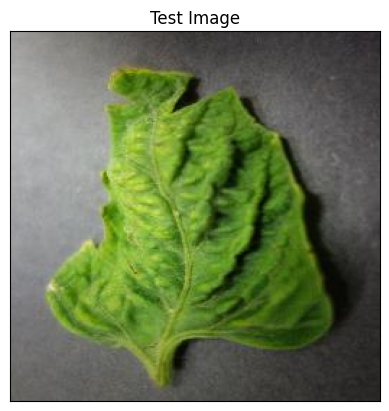

In [25]:
# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: The file at path '{image_path}' does not exist.")
else:
    # Load and process the test image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image from path '{image_path}'.")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization
        plt.imshow(img)
        plt.title('Test Image')
        plt.xticks([])
        plt.yticks([])
        plt.show()

In [26]:
# Preprocess the image for ResNet50
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))  # Resize for ResNet50
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = tf.keras.applications.resnet50.preprocess_input(input_arr)  # Apply ResNet50 preprocessing
input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to a batch

In [27]:
# Predict the class
predictions = cnn.predict(input_arr)
print("Predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predictions: [[3.17724371e-08 4.16600131e-12 1.40309885e-05 1.72457881e-09
  1.45020107e-09 1.67807848e-08 4.30853487e-13 3.81226828e-09
  8.82367290e-10 2.53057834e-07 7.59291829e-09 2.93055564e-06
  9.49825640e-09 1.14153336e-08 6.98517147e-11 7.93000776e-09
  1.20461053e-07 1.89789451e-09 1.58170171e-10 5.94161020e-06
  5.26564556e-12 1.62037324e-07 3.37855433e-08 3.75189302e-08
  5.54344126e-10 4.54021876e-10 7.13088061e-11 3.39025149e-15
  1.98030066e-05 8.32914472e-01 1.51301050e-04 6.06030293e-09
  2.13121652e-07 7.36501825e-05 2.08153258e-04 2.32623331e-02
  1.43346399e-01 7.26109874e-08]]


In [28]:
result_index = np.argmax(predictions)  # Get the index of the maximum probability
print("Predicted Index:", result_index)

Predicted Index: 29


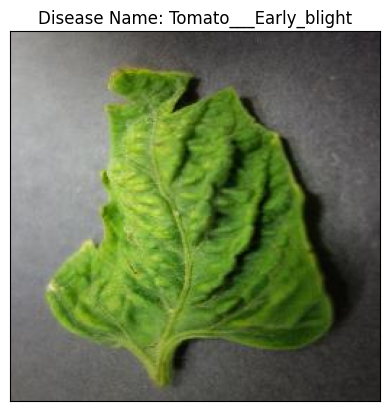

In [29]:
# Display the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()